# PDS: Assignment 1

### Deadline: April 18 (until 23:59)


**Instructions:** All answers should be filled in the notebook and then submitted to Moodle. For theoretical question you can use markdown and LaTeX. Name of notebook should be in following format:
 - Name_group_Assignment_1.ipynb (ex. Bill_Gates_1905_Assignment_1.ipynb)
 - Try to use fewer cells for compilation (for example, you can use print for several answers, instead of printing each answer on a separate cell)
 - **PLEASE:** submit only one jupyter notebook (no zip or csv files) and with your names as in the instruction. Ohterwise, there will be punishment for 50%.

## Q1 (20%)
Prove the Bias-Variance tradeoff decomposition, where MSE can be written as a sum of Variance of the estimator, Bias (squared) of the estimator and an irreducible error. 

<img src="data/bias_variance_tradeoff_proof.png">

## Q2 (30%)
- read netflix data: 0%
- find ratios of Movies and TV Shows for different countries: 10%
- plot histogram of average duration length for movies with following genres: "dramas", "comedies", "sports movies" (for this case use only first genre): 10%
- create pivot table with count of word "love" in description for different genres (for this case use only first genre): 10%

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 9

In [2]:
netflix = pd.read_csv('data/netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
netflix.shape

(7787, 12)

In [23]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [24]:
netflix['country'] = netflix['country'].astype('str')

In [25]:
netflix['country_2'] = netflix['country'].apply(lambda x: x.split(',')[0])

In [26]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,country_2
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Mexico
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Singapore
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",United States
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,United States


In [44]:
df = netflix.pivot_table(index = 'country_2', columns = 'type', values = 'show_id', aggfunc = 'count', margins = True).sort_values('All', ascending = False)
df.head()

type,Movie,TV Show,All
country_2,,,
All,5377.0,2410.0,7787
United States,2100.0,783.0,2883
India,883.0,73.0,956
United Kingdom,341.0,236.0,577
nan,230.0,277.0,507


In [47]:
df['Movie %'] = np.round(df['Movie'] / df['All'] * 100, 2)
df['TV Show %'] = np.round(df['TV Show'] / df['All'] * 100, 2)
df.head(10)

type,Movie,TV Show,All,Movie %,TV Show %
country_2,,,,,
All,5377.0,2410.0,7787,69.05,30.95
United States,2100.0,783.0,2883,72.84,27.16
India,883.0,73.0,956,92.36,7.64
United Kingdom,341.0,236.0,577,59.10,40.90
nan,230.0,277.0,507,45.36,54.64
Canada,175.0,84.0,259,67.57,32.43
Japan,75.0,162.0,237,31.65,68.35
France,137.0,59.0,196,69.90,30.10
South Korea,42.0,152.0,194,21.65,78.35


In [56]:
netflix['duration_2'] = netflix['duration'].apply(lambda x: x.split(' ')[0]).astype(int)
netflix['genre'] = netflix['listed_in'].apply(lambda x: x.split(',')[0].lower())
movies = netflix[(netflix['type']=='Movie') & (netflix['genre'].isin(['dramas', 'comedies', 'sports movies']))]

movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,country_2,duration_2,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Mexico,93,dramas
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,United States,123,dramas
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...,United States,119,dramas
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,United States,103,dramas
15,s16,Movie,Oct-01,Kunle Afolayan,"Sadiq Daba, David Bailie, Kayode Olaiya, Kehin...",Nigeria,"September 1, 2019",2014,TV-14,149 min,"Dramas, International Movies, Thrillers",Against the backdrop of Nigeria's looming inde...,Nigeria,149,dramas


<AxesSubplot:xlabel='genre', ylabel='duration_2'>

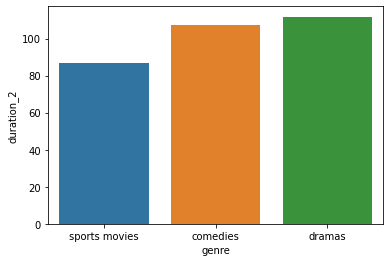

In [64]:
sns.barplot(data = movies.pivot_table(index='genre', values = 'duration_2').reset_index().sort_values('duration_2'), y = 'duration_2', x = 'genre')

In [68]:
def love(s):
    s = s.lower()
    cnt = 0
    for i in range(len(s)-5):
        if s[i:i+4] == 'love':
            cnt += 1
    return cnt

netflix['love_cnt'] = netflix['description'].apply(love)

netflix[netflix['love_cnt'] > 1]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,country_2,duration_2,genre,love_cnt
199,s200,TV Show,A Love So Beautiful,NaN,"Kim Yo-han, So Joo-yeon, Yeo Hoi-hyun, Jeong J...",South Korea,"December 28, 2020",2020,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Love is as tough as it is sweet for a lovestru...,South Korea,1,international tv shows,2
842,s843,Movie,"Berlin, I Love You",NaN,NaN,Germany,"June 8, 2019",2019,R,120 min,"Dramas, International Movies, Romantic Movies","Set in the Grey City, this ""Cities of Love"" in...",Germany,120,dramas,2
1431,s1432,TV Show,Club Friday The Series 6,NaN,"Puttichai Kasetsin, Kongtoranin Lalana, Preech...",nan,"March 9, 2019",2015,TV-MA,9 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Based on a Thai radio show that gives love adv...,nan,9,international tv shows,2
1817,s1818,Movie,Don't Go Breaking My Heart 2,Johnnie To,"Louis Koo, Gao Yuanyuan, Miriam Chin Wah Yeung...","Hong Kong, China","December 1, 2018",2014,TV-14,113 min,"Comedies, International Movies, Romantic Movies","Zixin is about to marry Qihong, but her galliv...",Hong Kong,113,comedies,2
1822,s1823,Movie,Donald Glover: Weirdo,"Shannon Hartman, Michelle Caputo",Donald Glover,United States,"November 19, 2016",2012,TV-MA,65 min,Stand-Up Comedy,Fearlessly funny stand-up comic and sitcom sta...,United States,65,stand-up comedy,2
3086,s3087,Movie,Iyore,Frank Rajah Arase,"Rita Dominic, Joseph Benjamin, Okawa Shaznay, ...",Nigeria,"December 20, 2019",2015,TV-PG,141 min,"Dramas, International Movies, Romantic Movies",A tragic romance unfolds during a teacher's le...,Nigeria,141,dramas,2
3281,s3282,Movie,Kabhi Haan Kabhi Naa,Kundan Shah,"Shah Rukh Khan, Suchitra Krishnamoorthi, Deepa...",India,"May 15, 2017",1994,TV-14,151 min,"Comedies, Dramas, International Movies",A dreamer falls for a girl who is in love with...,India,151,comedies,2
3288,s3289,Movie,Kajraare,Pooja Bhatt,"Himesh Reshammiya, Sara Loren, Amrita Singh, G...",India,"October 22, 2017",2010,TV-14,113 min,"Dramas, International Movies, Music & Musicals",A popular singer on the run poses as a bartend...,India,113,dramas,2
3455,s3456,Movie,Krishna Cottage,Santram Varma,"Sohail Khan, Isha Koppikar, Natasha, Rati Agni...",India,"May 31, 2019",2004,TV-MA,124 min,"Action & Adventure, Horror Movies, Internation...",True love is put to the test when another woma...,India,124,action & adventure,2
3482,s3483,Movie,Kyun! Ho Gaya Na,Samir Karnik,"Aishwarya Rai Bachchan, Vivek Oberoi, Amitabh ...",India,"March 1, 2018",2004,TV-PG,165 min,"International Movies, Romantic Movies",Cinematic lovebirds Aishwarya Rai and Vivek Ob...,India,165,international movies,2


In [69]:
print(netflix.loc[7033, 'description'])

When shy Kumar gets stuck on the losing end of a love triangle, the Love Doctor, Mokia, has a strategy for Kumar to win the love of his life.


In [128]:
netflix.pivot_table(index = 'genre', values = 'love_cnt', aggfunc = 'sum').sort_values('love_cnt', ascending=False)

,love_cnt
genre,
dramas,163
international tv shows,119
comedies,112
action & adventure,38
children & family movies,22
stand-up comedy,18
kids' tv,16
documentaries,15
international movies,14


In [72]:
netflix.pivot_table(index = 'genre', values = 'love_cnt').sort_values('love_cnt', ascending=False)

,love_cnt
genre,
romantic tv shows,0.285714
international tv shows,0.172464
international movies,0.122807
dramas,0.117775
anime features,0.105263
comedies,0.104283
classic & cult tv,0.095238
classic movies,0.077922
reality tv,0.068627


## Q3 (20%)
Read "tidy_data.xlsx" and make it in Tidy Data Format. Plot scatterplots for each persons test results. 

_There should be 6 different scatterplots for each person_

_In every scatterplot there should be 25 different colors in scatterplot for each test_

In [73]:
df = pd.read_excel('data/tidy_data.xlsx')
df.head()

,date,Name,Sex,test1,test2,test3,test4,test5,test6,test7,...,test16,test17,test18,test19,test20,test21,test22,test23,test24,test25
0,2020-05-29,Joey,M,5,74,-47,662247,1,534,-56,...,100,35,21,72,17,68,5,100,87,62
1,2021-04-07,Chandler,M,0,80,21,431382,2,514,-109,...,18,19,27,60,45,48,0,72,46,3
2,2021-05-06,Rachel,F,6,20,24,949910,1,371,-6,...,54,82,89,33,8,47,1,82,71,16
3,2020-10-10,Joey,M,9,65,23,67592,3,893,-105,...,30,78,99,45,23,96,77,57,98,23
4,2020-08-27,Ross,M,6,25,-24,176408,2,775,-75,...,10,12,6,91,60,37,24,68,11,7


In [77]:
test = df.loc[:, 'test1':'test25']

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test)

In [81]:
df.loc[:, 'test1':'test25'] = test_scaled

In [82]:
df.head()

,date,Name,Sex,test1,test2,test3,test4,test5,test6,test7,...,test16,test17,test18,test19,test20,test21,test22,test23,test24,test25
0,2020-05-29,Joey,M,0.057806,0.705521,-1.583213,0.668062,-0.451895,0.030503,0.001919,...,1.697607,-0.479373,-1.023658,0.676593,-1.090935,0.663217,-1.481425,1.669056,1.215085,0.438567
1,2021-04-07,Chandler,M,-1.530266,0.935332,1.511311,-0.149934,0.485647,-0.038759,-1.638730,...,-1.094173,-1.045673,-0.818927,0.268351,-0.159024,-0.033220,-1.647489,0.686474,-0.174940,-1.596308
2,2021-05-06,Rachel,F,0.375420,-1.362781,1.647834,1.687302,-0.451895,-0.533980,1.549702,...,0.131486,1.184134,1.296634,-0.650193,-1.390478,-0.068042,-1.614276,1.037396,0.672637,-1.147946
3,2020-10-10,Joey,M,1.328263,0.360804,1.602326,-1.438905,1.423189,1.273751,-1.514908,...,-0.685620,1.042559,1.637853,-0.241951,-0.891240,1.638229,0.909898,0.160091,1.588019,-0.906520
4,2020-08-27,Ross,M,0.375420,-1.171271,-0.536536,-1.053351,0.485647,0.865106,-0.586238,...,-1.366542,-1.293430,-1.535487,1.322976,0.340214,-0.416261,-0.850381,0.546105,-1.361547,-1.458350


In [83]:
df_long = pd.melt(
    df,
    id_vars = ['date', 'Name', 'Sex'],
    var_name = 'test',
    value_name = 'value'
)

In [84]:
df_long.head()

,date,Name,Sex,test,value
0,2020-05-29,Joey,M,test1,0.057806
1,2021-04-07,Chandler,M,test1,-1.530266
2,2021-05-06,Rachel,F,test1,0.375420
3,2020-10-10,Joey,M,test1,1.328263
4,2020-08-27,Ross,M,test1,0.375420


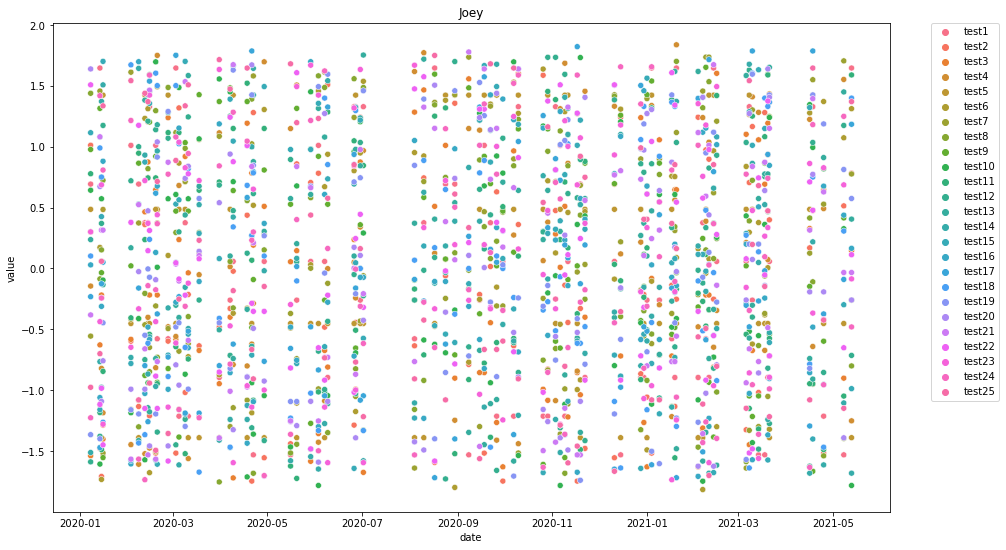

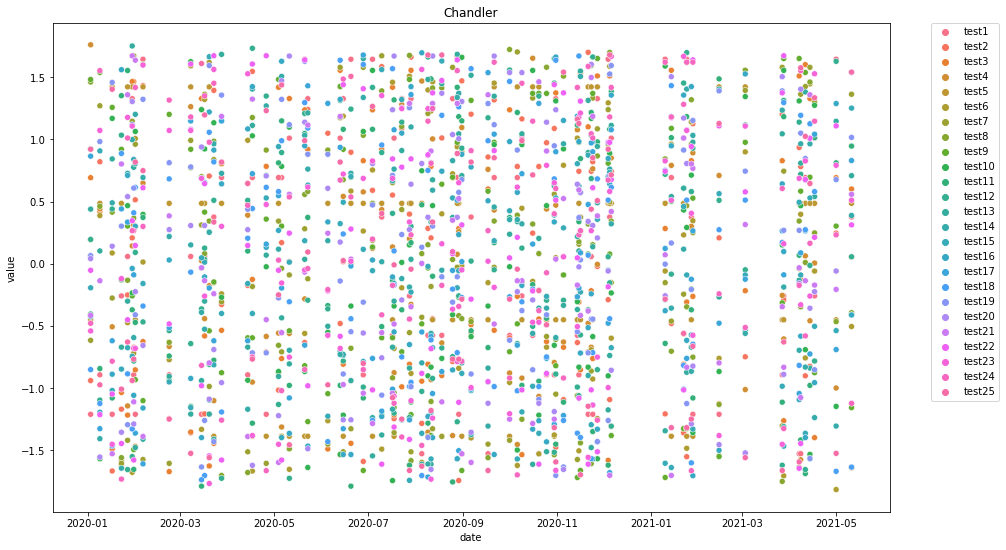

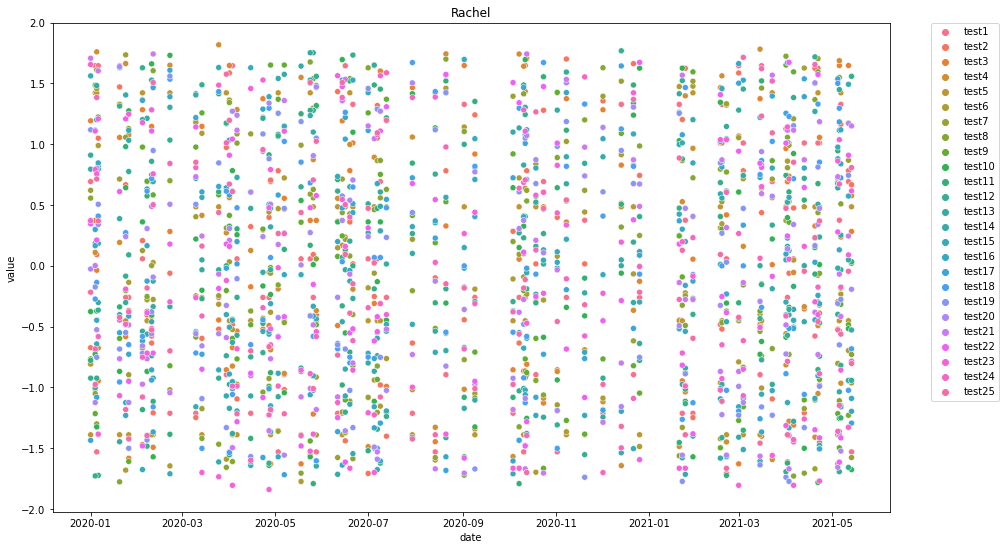

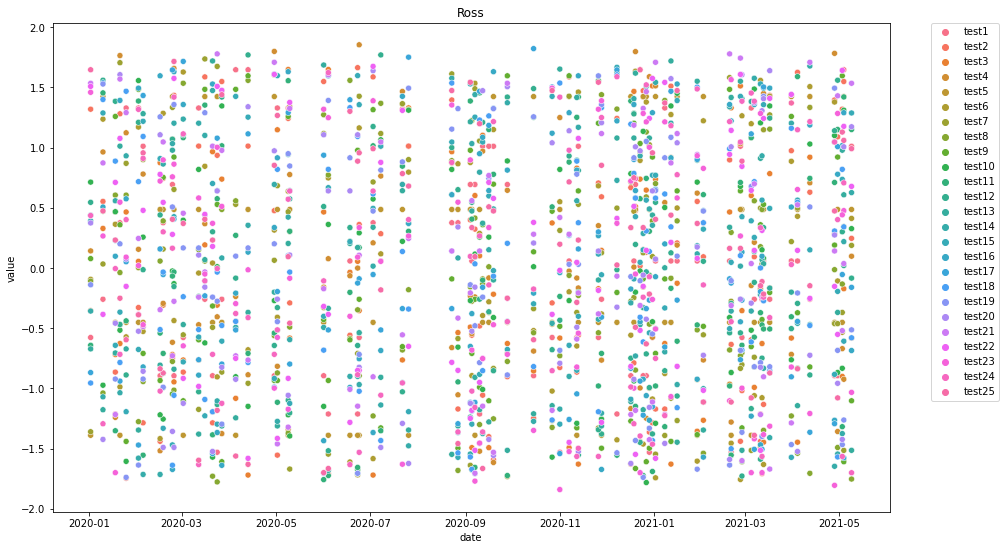

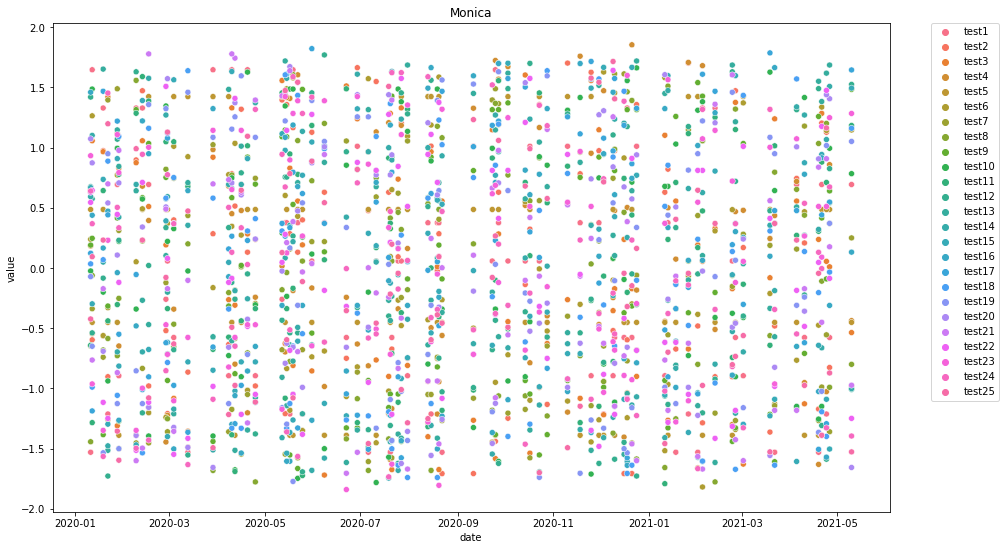

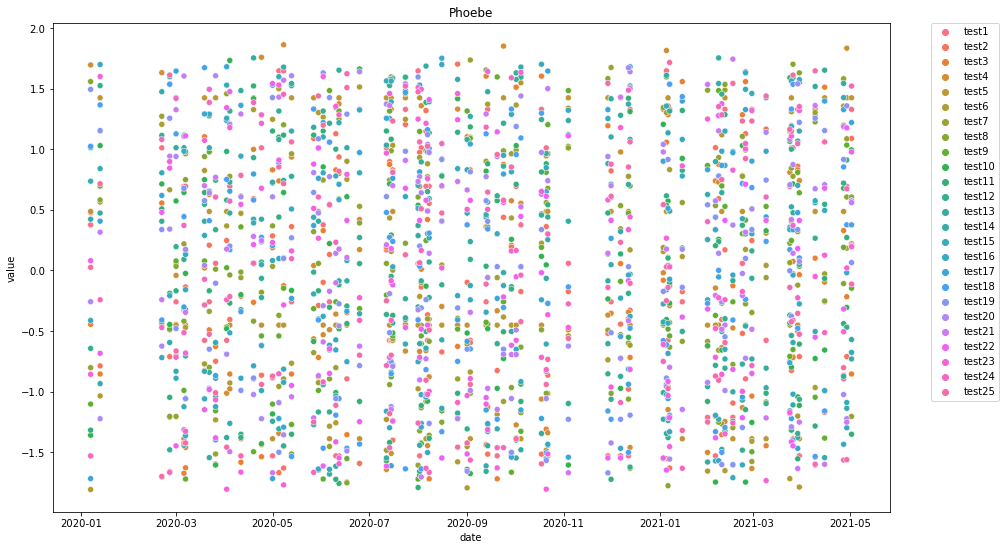

In [101]:
for name in ['Joey', 'Chandler', 'Rachel', 'Ross', 'Monica', 'Phoebe']:
    _ = sns.scatterplot(data = df_long[df_long['Name'] == name], x = 'date', y = 'value', hue = 'test')
    _ = plt.title(name)
    _ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

## Q4 (30%)
- read "knn_bias_variance_tradeoff.csv" file: 0%
- split your data into train and test samples with test_size = 0.3: 5%
- create bias variance tradeoff plot of accuracy of your KNN model for train and test: 5%
- normalize (use algorithm of your choice) your entire data, and then split your data into train and test samples with test_size = 0.3: 5%
- based on normalized data create bias variance tradeoff plot of accuracy of your KNN model for train and test: 5%
- try to use auc metrics instead of accuracy, and then create bias variance tradeoff plot: 5%
- make conclusions of your findings (which data outputs clear bias variance tradeoff plot, which accuracy outputs clear bias variance tradeoff plot, etc.): 5%

In [125]:
df = pd.read_csv('data/knn_bias_variance_tradeoff.csv')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [126]:
df.shape

(1000, 11)

In [103]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('TARGET CLASS', axis = 1), df['TARGET CLASS'], test_size = 0.3, random_state = 42)

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [111]:
k = np.arange(1, 100, 2)
accuracy_train, accuracy_test = [], []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_train = knn.predict(X_train)
    pred_test = knn.predict(X_test)
    accuracy_train.append(accuracy_score(y_train, pred_train))
    accuracy_test.append(accuracy_score(y_test, pred_test))
    
acc_df = pd.DataFrame({'k':k, 'train_acc':accuracy_train, 'test_acc':accuracy_test})

In [113]:
acc_df = acc_df.melt(id_vars = 'k', var_name = 'train/test', value_name = 'accuracy')

In [114]:
acc_df

,k,train/test,accuracy
0,1,train_acc,1.000000
1,3,train_acc,0.867143
2,5,train_acc,0.832857
3,7,train_acc,0.835714
4,9,train_acc,0.840000
...,...,...,...
95,91,test_acc,0.813333
96,93,test_acc,0.820000
97,95,test_acc,0.816667
98,97,test_acc,0.820000


<AxesSubplot:xlabel='k', ylabel='accuracy'>

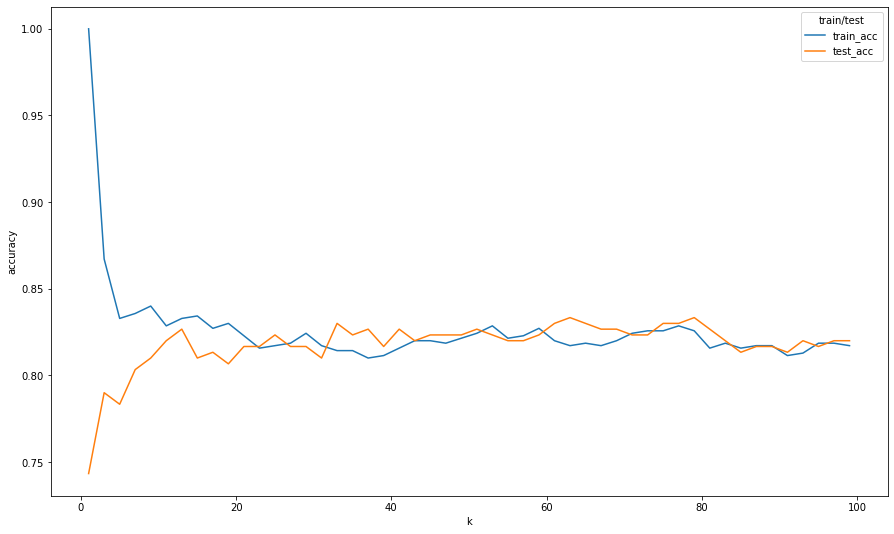

In [115]:
sns.lineplot(data = acc_df, x = 'k', y = 'accuracy', hue = 'train/test')

In [116]:
scaled = df.loc[:, 'XVPM':'JHZC']

In [117]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(scaled)

In [127]:
df_scaled

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [121]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['TARGET CLASS'], test_size = 0.3, random_state = 42)

In [122]:
k = np.arange(1, 100, 2)
accuracy_train, accuracy_test = [], []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_train = knn.predict(X_train)
    pred_test = knn.predict(X_test)
    accuracy_train.append(accuracy_score(y_train, pred_train))
    accuracy_test.append(accuracy_score(y_test, pred_test))
    
acc_df = pd.DataFrame({'k':k, 'train_acc':accuracy_train, 'test_acc':accuracy_test})

In [123]:
acc_df = acc_df.melt(id_vars = 'k', var_name = 'train/test', value_name = 'accuracy')

<AxesSubplot:xlabel='k', ylabel='accuracy'>

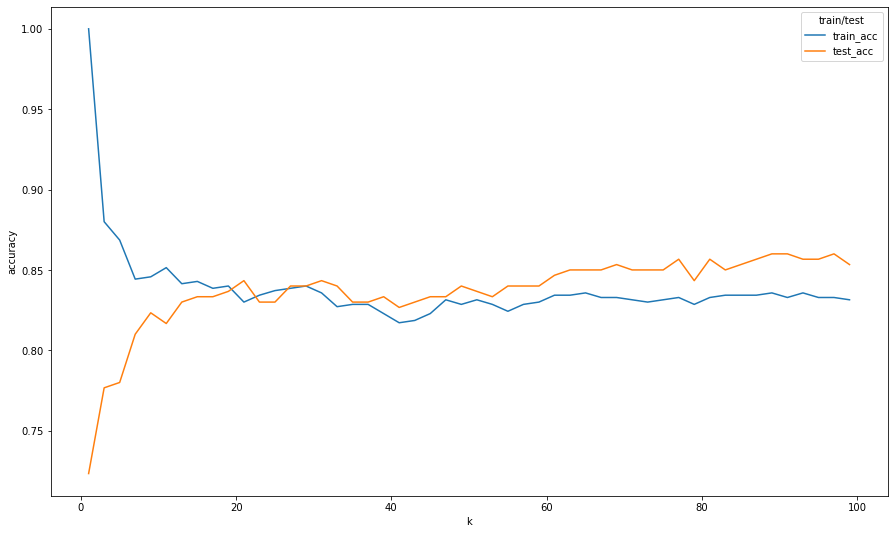

In [124]:
sns.lineplot(data = acc_df, x = 'k', y = 'accuracy', hue = 'train/test')

In [133]:
from sklearn.metrics import roc_auc_score

k = np.arange(1, 100, 2)
accuracy_train, accuracy_test = [], []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_train = knn.predict_proba(X_train)
    pred_test = knn.predict_proba(X_test)
    accuracy_train.append(roc_auc_score(y_train, pred_train))
    accuracy_test.append(roc_auc_score(y_test, pred_test))
    
acc_df = pd.DataFrame({'k':k, 'train_acc':accuracy_train, 'test_acc':accuracy_test})

ValueError: y should be a 1d array, got an array of shape (700, 2) instead.

In [131]:
acc_df = acc_df.melt(id_vars = 'k', var_name = 'train/test', value_name = 'accuracy')

<AxesSubplot:xlabel='k', ylabel='accuracy'>

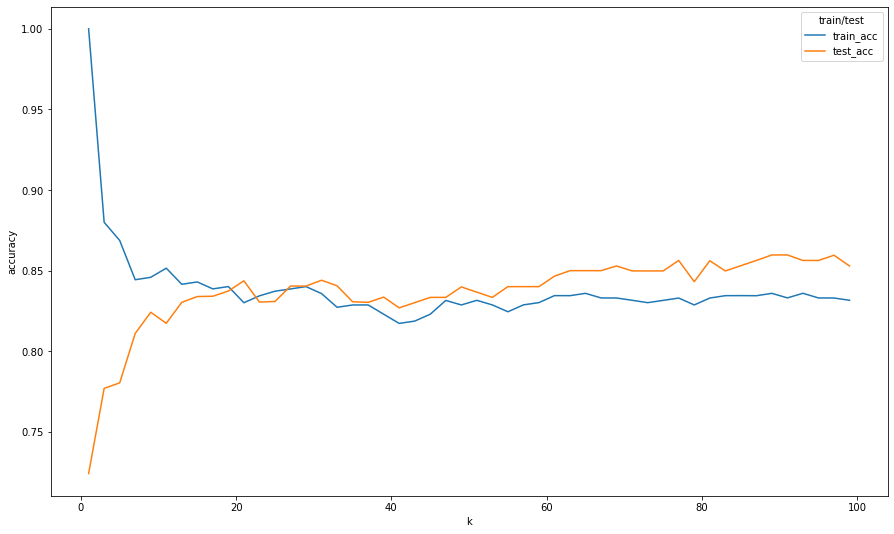

In [132]:
sns.lineplot(data = acc_df, x = 'k', y = 'accuracy', hue = 'train/test')